In [2]:
import json
import pandas as pd
from sklearn.metrics import silhouette_score,calinski_harabasz_score,pairwise_distances
from Kernels.src.Analysis.Clustering import *
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
import itertools
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.mosaicplot import mosaic
import lifelines
import statsmodels.api as sm
import itertools
from scipy import stats
import plotly.graph_objects as go
from matplotlib.offsetbox import AnchoredText
import matplotlib.font_manager as fm

In [3]:
fontPath = "/CTGlab/home/danilo/.fonts/arial.ttf" 
#From seaborn#########
sns.set_context("paper")
sns.set_style("whitegrid")
#sns.set(font='Helvetica')

#From matplotlib########
#Font:
prop = fm.FontProperties(fname=fontPath)
fm.fontManager.addfont(fontPath)
plt.rcParams['font.family'] = prop.get_name()
#plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.labelspacing'] = 1.5
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.titlepad']=5
# Disable LaTeX interpreter
plt.rcParams['text.usetex'] = False

#lines:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
#plt.rcParams['axes.edgecolor'] = '#353935'
 



In [4]:
def AMI_ARI_calc(df,tag='_100',tag2='_1000'):
    #Caluculate ari and ami between same clusterings
    ami_ari_dict_list=[]
    for col in df.columns:
        if tag2 not in col:
            break

        clust=col.split('_')
  

        if clust[1]=='Z':
            ftmap=clust[1]

        
        elif clust[1]=='ZZ':
            ftmap=clust[1]+'_'+clust[2]
        else:
            ftmap='rbf'
    
 
        ari=adjusted_rand_score(df['_'.join(clust[:-1])+tag2],df['_'.join(clust[:-1])+tag])
        nmi=normalized_mutual_info_score(df['_'.join(clust[:-1])+tag2],df['_'.join(clust[:-1])+tag])
        ami=adjusted_mutual_info_score(df['_'.join(clust[:-1])+tag2],df['_'.join(clust[:-1])+tag])



        ami_ari_dict_list.append({'ftmap':ftmap,
                              'K':clust[-3],
                              'Bandwidth':clust[-2],
                              'ARI':ari,
                              'NMI':nmi,
                              'AMI':ami})
    return pd.DataFrame(ami_ari_dict_list)

# Load and parse data

In [5]:
data_input = pd.read_csv("Input_data/UMAP_METABRIC_4cmp_IC10_full.csv", sep = ",",index_col=0)

In [6]:
#Load all different sampling results
df_1980=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_2000_umap/clustering_1980_opt_k_reviewed.csv',index_col=0)
df_1000=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_1000_umap/clustering_1000_opt_k_reviewed.csv',index_col=0)
df_800=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_800_umap/clustering_800_opt_k_reviewed.csv',index_col=0)
df_500=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_500_umap/clustering_500_opt_k_reviewed.csv',index_col=0)
df_250=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_250_umap/clustering_250_opt_k_reviewed.csv',index_col=0)
df_100=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_100_umap/clustering_100_opt_k_reviewed.csv',index_col=0)
df_50=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_50_umap/clustering_50_opt_k_reviewed.csv',index_col=0)

In [7]:
#Parse and correct data
df_1980.replace('Z_full','Z',inplace=True)
df_1000.replace('Z_full','Z',inplace=True)
df_800.replace('Z_full','Z',inplace=True)
df_500.replace('Z_full','Z',inplace=True)
df_250.replace('Z_full','Z',inplace=True)
df_100.replace('Z_full','Z',inplace=True)
df_50.replace('Z_full','Z',inplace=True)

In [8]:
df_clust_1980=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_2000_umap/clustering_1980_clusters.csv',index_col=0)
df_clust_1980.index=data_input.sample(n=1980,axis=0,random_state=42).index
df_clust_1000=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_1000_umap/clustering_1000_clusters.csv',index_col=0)
df_clust_1000.index=data_input.sample(n=1000,axis=0,random_state=42).index
df_clust_800=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_800_umap/clustering_800_clusters.csv',index_col=0)
df_clust_800.index=data_input.sample(n=800,axis=0,random_state=42).index
df_clust_500=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_500_umap/clustering_500_clusters.csv',index_col=0)
df_clust_500.index=data_input.sample(n=500,axis=0,random_state=42).index
df_clust_250=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_250_umap/clustering_250_clusters.csv',index_col=0)
df_clust_250.index=data_input.sample(n=250,axis=0,random_state=42).index
df_clust_100=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_100_umap/clustering_100_clusters.csv',index_col=0)
df_clust_100.index=data_input.sample(n=100,axis=0,random_state=42).index
df_clust_50=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_50_umap/clustering_50_clusters.csv',index_col=0)
df_clust_50.index=data_input.sample(n=50,axis=0,random_state=42).index

In [9]:
df_clust_250.columns = df_clust_250.columns.str.replace("_Z_full", "_Z")
df_clust_100.columns = df_clust_100.columns.str.replace("_Z_full", "_Z")
df_clust_500.columns = df_clust_500.columns.str.replace("_Z_full", "_Z")
df_clust_50.columns = df_clust_50.columns.str.replace("_Z_full", "_Z")
df_clust_800.columns = df_clust_800.columns.str.replace("_Z_full", "_Z")
df_clust_1000.columns = df_clust_1000.columns.str.replace("_Z_full", "_Z")
df_clust_1980.columns = df_clust_1980.columns.str.replace("_Z_full", "_Z")

In [10]:
#Drop rbf Bandwith !=1
df_1980.drop(df_1980[(df_1980.ftmap=='rbf') & (df_1980.Bandwidth!=1)].index,inplace=True)
df_1000.drop(df_1000[(df_1000.ftmap=='rbf') & (df_1000.Bandwidth!=1)].index,inplace=True)
df_800.drop(df_800[(df_800.ftmap=='rbf') & (df_800.Bandwidth!=1)].index,inplace=True)
df_500.drop(df_500[(df_500.ftmap=='rbf') & (df_500.Bandwidth!=1)].index,inplace=True)
df_250.drop(df_250[(df_250.ftmap=='rbf') & (df_250.Bandwidth!=1)].index,inplace=True)
df_100.drop(df_100[(df_100.ftmap=='rbf') & (df_100.Bandwidth!=1)].index,inplace=True)


# Analysis with respect to 1000

In [11]:
#Merge all data with 1000
df_sampling_250=df_clust_1000.join(df_clust_250,how='inner',lsuffix='_1000',rsuffix='_250')
df_sampling_500=df_clust_1000.join(df_clust_500,how='inner',lsuffix='_1000',rsuffix='_500')
df_sampling_50=df_clust_1000.join(df_clust_50,how='inner',lsuffix='_1000',rsuffix='_50')
df_sampling_100=df_clust_1000.join(df_clust_100,how='inner',lsuffix='_1000',rsuffix='_100')
df_sampling_800=df_clust_1000.join(df_clust_800,how='inner',lsuffix='_1000',rsuffix='_800')


Calculate AMI and ARI score between 1000 and lower sampling

In [12]:
df_nmi_ari_100=AMI_ARI_calc(df_sampling_100,tag='_100')
df_nmi_ari_250=AMI_ARI_calc(df_sampling_250,tag='_250')
df_nmi_ari_500=AMI_ARI_calc(df_sampling_500,tag='_500')
df_nmi_ari_50=AMI_ARI_calc(df_sampling_50,tag='_50') 
df_nmi_ari_800=AMI_ARI_calc(df_sampling_800,tag='_800')   


In [13]:
df_nmi_ari_800

ftmap   K Bandwidth       ARI       NMI       AMI
0          rbf   2     0.125  0.994719  0.985020  0.985003
1          rbf   3     0.125  0.984617  0.965950  0.965823
2          rbf   4     0.125  0.988488  0.978621  0.978507
3          rbf   5     0.125  0.884653  0.889010  0.888188
4          rbf   6     0.125  0.990574  0.987255  0.987128
..         ...  ..       ...       ...       ...       ...
175  ZZ_linear   6         2  0.401189  0.479195  0.474447
176  ZZ_linear   7         2  0.421437  0.499086  0.492995
177  ZZ_linear   8         2  0.425188  0.515827  0.508351
178  ZZ_linear   9         2  0.609466  0.667788  0.661368
179  ZZ_linear  10         2  0.491685  0.592256  0.582572

[180 rows x 6 columns]

In [14]:
#Parse bandwidth for future plots
for df in [df_nmi_ari_100,df_nmi_ari_250,df_nmi_ari_500,df_nmi_ari_50,df_nmi_ari_800]:
    df[r'$\beta$']=df['Bandwidth'].map({'0.125':r'$\frac{\pi}{8}$','0.25':r'$\frac{\pi}{4}$','0.5':r'$\frac{\pi}{2}$','1':r'$\pi$','2':r'$2\pi$'})

In [15]:
#Merge all data and add info about sampling
to_concat=[df_nmi_ari_100,df_nmi_ari_250,df_nmi_ari_500,df_nmi_ari_50,df_nmi_ari_800]
to_concat_new=[]
for df,n in zip(to_concat,[100,250,500,50,800]):
    df['Bandwidth']=df['Bandwidth'].astype(float)
    df['K']=df['K'].astype(int)
    df['Sampling']=[n]*len(df.index)
    #merge with 1000 with info on silhouette ecc
    df_new=df.merge(df_1000.drop('N_samples',axis=1),left_on=['ftmap','K','Bandwidth'],right_on=['ftmap','K','Bandwidth'])
    to_concat_new.append(df_new)
  
df_nmi_ari=pd.concat(to_concat)



In [16]:
df_nmi_ari_new=pd.concat(to_concat_new)
df_nmi_ari_new.head(10)

ftmap   K  Bandwidth       ARI       NMI       AMI          $\beta$  \
0      rbf   2      1.000 -0.036213  0.025203  0.007628            $\pi$   
1      rbf   3      1.000  0.960132  0.930571  0.928469            $\pi$   
2      rbf   4      1.000  0.749738  0.814390  0.805991            $\pi$   
3      rbf   5      1.000  0.476494  0.637160  0.613408            $\pi$   
4      rbf   6      1.000  0.603511  0.739067  0.715228            $\pi$   
5      rbf   7      1.000  0.440362  0.661106  0.618943            $\pi$   
6      rbf   8      1.000  0.589945  0.779044  0.742818            $\pi$   
7      rbf   9      1.000  0.754720  0.849944  0.818804            $\pi$   
8      rbf  10      1.000  0.707407  0.807914  0.759963            $\pi$   
9  ZZ_full   2      0.125 -0.072207  0.150403  0.142495  $\frac{\pi}{8}$   

   Sampling              s  geom_distance  concentration  silhouette  \
0       100   74501.173166       2.500972       0.029959    0.542565   
1       100   74501.173166       2.500972       0.029959    0.572370   
2       100   74501.173166       2.500972       0.029959    0.419561   
3       100   74501.173166       2.500972       0.029959    0.404097   
4       100   74501.173166       2.500972       0.029959    0.392686   
5       100   74501.173166       2.500972       0.029959    0.407904   
6       100   74501.173166       2.500972       0.029959    0.395397   
7       100   74501.173166       2.500972       0.029959    0.376679   
8       100   74501.173166       2.500972       0.029959    0.374544   
9       100  103667.778348       3.989567       0.055737    0.332245   

   Score_cluster         CHI        DI   v_intra   v_inter  
0       0.548716  670.054354  0.001045  0.019163  0.025802  
1       0.620737  529.898257  0.000929  0.008170  0.032906  
2       0.616219  547.824164  0.002553  0.005853  0.032249  
3       0.652419  525.682252  0.000729  0.005026  0.030578  
4       0.680109  481.499765  0.000729  0.004570  0.030022  
5       0.719146  507.595970  0.001485  0.003319  0.029624  
6       0.734598  482.822831  0.002395  0.003016  0.029523  
7       0.742801  467.983981  0.000944  0.002884  0.029477  
8       0.753077  462.980483  0.000657  0.002328  0.029433  
9       0.335506  383.135201  0.033541  0.041719  0.034648

In [17]:
to_drop=df_nmi_ari_new[(df_nmi_ari_new.ftmap=='rbf') & (df_nmi_ari_new.Bandwidth!=1)].index
df_nmi_ari_new.drop(to_drop,inplace=True)

In [18]:
df_nmi_ari_new['Clust']=df_nmi_ari_new['ftmap']+'_'+df_nmi_ari_new['K'].astype(str)+'_'+df_nmi_ari_new[r'$\beta$'].astype(str)
df_nmi_ari_new['Clust_2']=df_nmi_ari_new['ftmap']+'_'+df_nmi_ari_new[r'$\beta$'].astype(str)


### Plots

(0.0, 1.05)

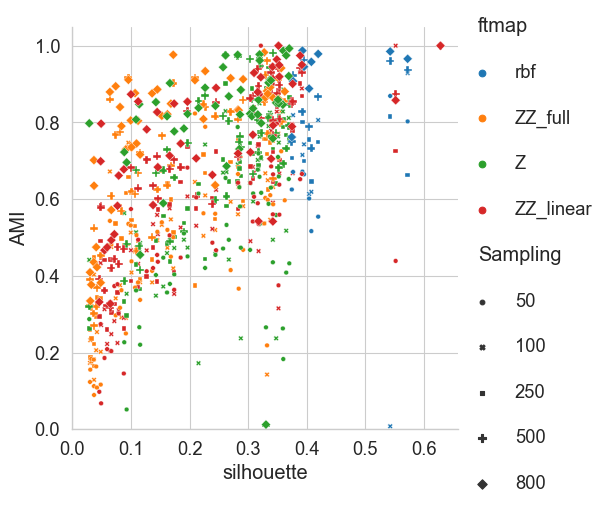

In [19]:
#Plot
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.relplot(data=df_nmi_ari_new,hue='ftmap',
             y='AMI',x='silhouette',style='Sampling',size='Sampling',markers=True,palette='tab10')
plt.ylim(0.00,1.05)

Plot trend of Quantum vs Classical Kernels

In [20]:
#New column quantum/classical
df_nmi_ari_new['Quantum/Classical']=df_nmi_ari_new['ftmap'].apply(lambda x: 'Quantum' if x!='rbf' else 'Classical')

(0.0, 1.05)

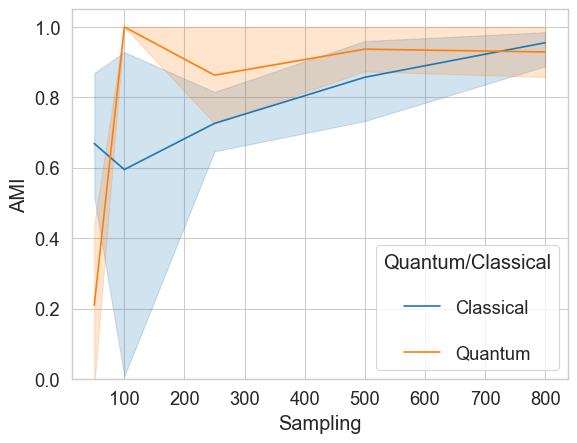

In [21]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.lineplot(data=df_nmi_ari_new[(df_nmi_ari_new.silhouette>0.4)],
             y='AMI',x='Sampling',hue='Quantum/Classical',errorbar=('pi',100),err_style='band',markers=True,palette='tab10')
plt.ylim(0.00,1.05)

/tmp/ipykernel_40548/2530073908.py:15: UserWarning: The markers list has more values (12) than needed (4), which may not be intended.
  sns.lineplot(ax=axes[2], data=data_k10, x='Sampling', y='AMI', style='Clust_2', markers=markers,markersize=7, hue='Clust_2', palette='Set2', legend=True, alpha=0.5)
/tmp/ipykernel_40548/2530073908.py:16: UserWarning: The markers list has more values (12) than needed (4), which may not be intended.
  sns.scatterplot(ax=axes[2], data=data_k10, x='Sampling', y='AMI', style='Clust_2', markers=markers,s=53,hue='Clust_2', palette='Set2', legend=False)
/tmp/ipykernel_40548/2530073908.py:22: UserWarning: The markers list has more values (12) than needed (3), which may not be intended.
  sns.lineplot(ax=axes[1], data=data_k2, x='Sampling', y='AMI', style='Clust_2',markersize=7,markers=markers, hue='Clust_2', palette='Set2', legend=True, alpha=0.5)
/tmp/ipykernel_40548/2530073908.py:23: UserWarning: The markers list has more values (12) than needed (3), which ma

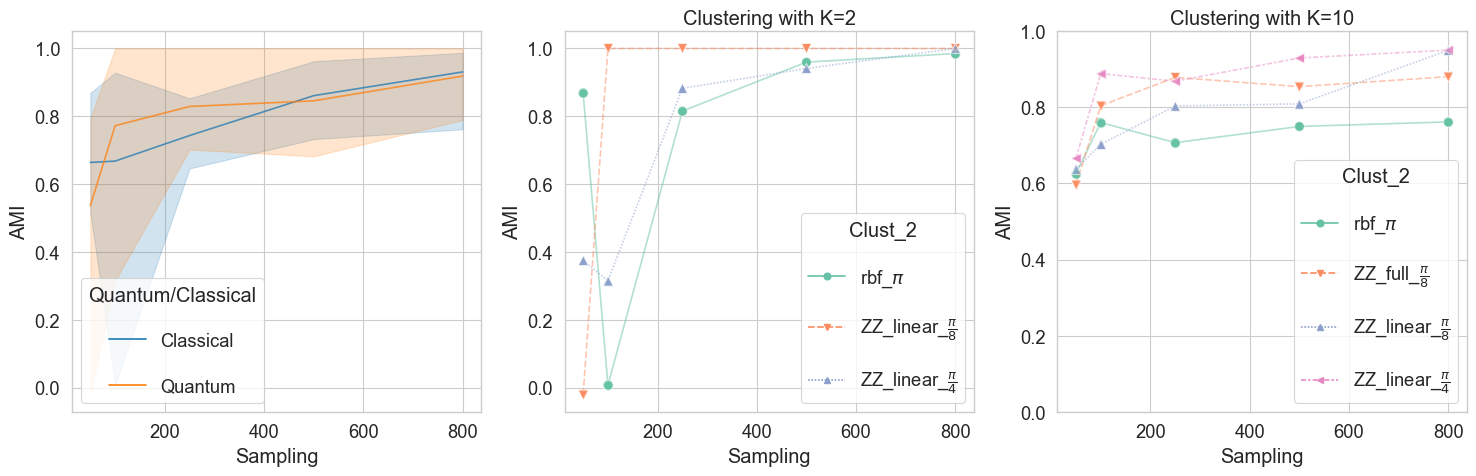

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define markers
markers = ["o", "v", "^", "<", ">", "8", "s", "*", "h", "H", "P", "p"]
#Plot all above 0.35 with mean
sns.lineplot(ax=axes[0],data=df_nmi_ari_new[(df_nmi_ari_new.silhouette >= 0.35)], 
             x='Sampling', y='AMI', hue='Quantum/Classical', err_style='band',errorbar=('pi',100),legend=True,palette='tab10',alpha=0.75)
#sns.lineplot(ax=axes[0],data=df_nmi_ari_new[(df_nmi_ari_new.silhouette >= 0.35)], 
                  #x='Sampling', y='AMI', hue='Quantum/Classical', markers=markers,style='Clust',palette='tab10',legend=False,alpha=0.15)
# Filter data for K=10 and K=2
data_k10 = df_nmi_ari_new[(df_nmi_ari_new.silhouette >= 0.35) & (df_nmi_ari_new.K == 10)]
data_k2 = df_nmi_ari_new[(df_nmi_ari_new.silhouette >= 0.35) & (df_nmi_ari_new.K == 2)]

# Plot for K=10
sns.lineplot(ax=axes[2], data=data_k10, x='Sampling', y='AMI', style='Clust_2', markers=markers,markersize=7, hue='Clust_2', palette='Set2', legend=True, alpha=0.5)
sns.scatterplot(ax=axes[2], data=data_k10, x='Sampling', y='AMI', style='Clust_2', markers=markers,s=53,hue='Clust_2', palette='Set2', legend=False)
sns.move_legend(axes[2], "lower right")
axes[2].set_title('Clustering with K=10')


# Plot for K=2
sns.lineplot(ax=axes[1], data=data_k2, x='Sampling', y='AMI', style='Clust_2',markersize=7,markers=markers, hue='Clust_2', palette='Set2', legend=True, alpha=0.5)
sns.scatterplot(ax=axes[1], data=data_k2, x='Sampling', y='AMI', style='Clust_2',s=53,markers=markers, hue='Clust_2', palette='Set2', legend=False)
axes[1].set_title('Clustering with K=2')


# Adjust layout
plt.ylim(0.00,1.0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_40548/3373498047.py:2: UserWarning: The markers list has more values (12) than needed (6), which may not be intended.
  sns.relplot(data=df_nmi_ari_new[(df_nmi_ari_new.silhouette >= 0.35)],


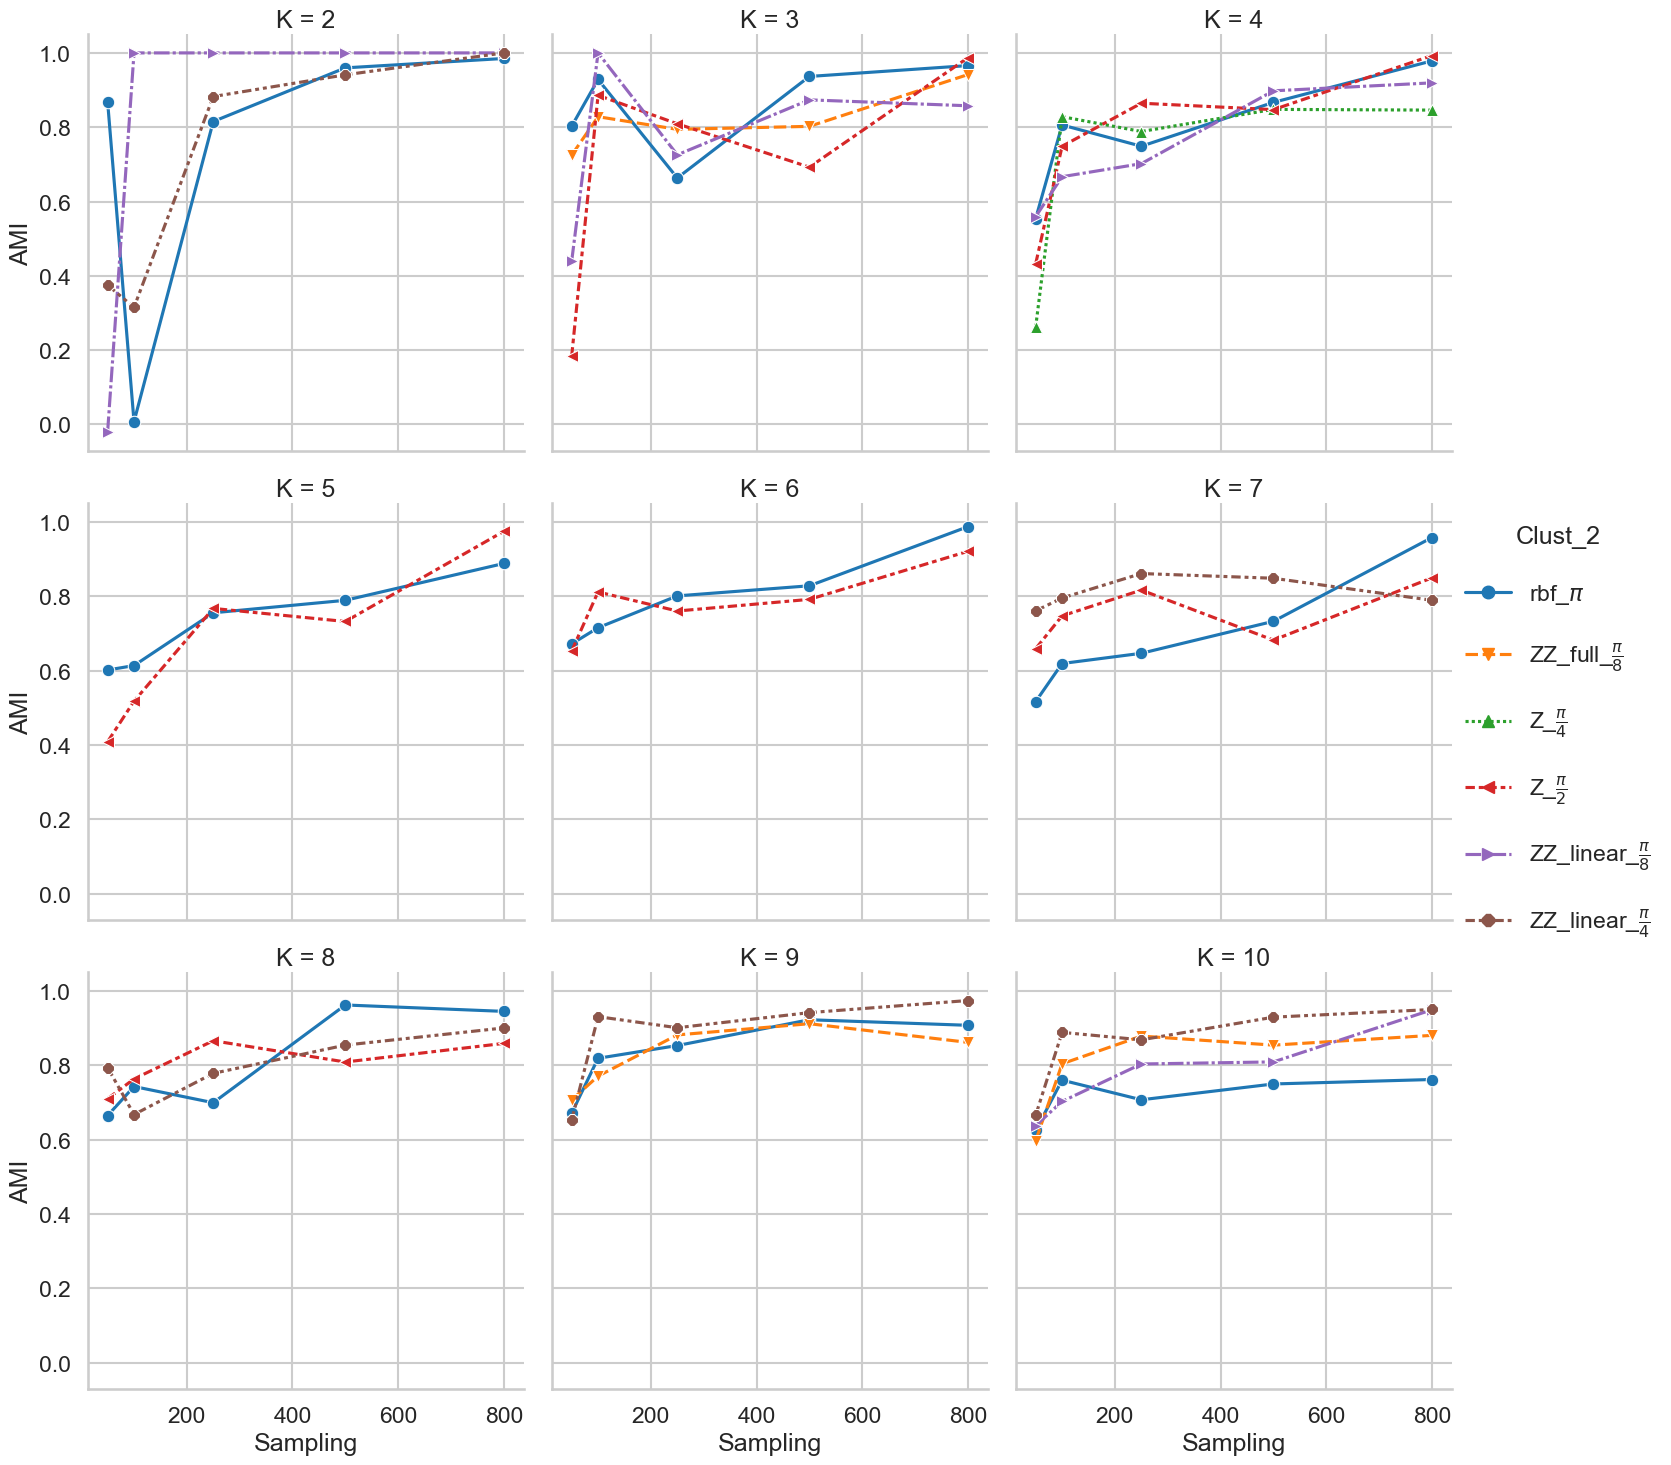

In [23]:
sns.set_context("talk", font_scale=1)
sns.relplot(data=df_nmi_ari_new[(df_nmi_ari_new.silhouette >= 0.35)],
             style='Clust_2', markers=markers, x='Sampling', y='AMI', hue='Clust_2', palette='tab10',col='K',col_wrap=3,kind='line')
#plt.xlim(0,500)

# Analysis with respect to 1980 samples

In [24]:
#Merge all data with 1980
df_sampling_250_2=df_clust_1980.join(df_clust_250,how='inner',lsuffix='_1980',rsuffix='_250')
df_sampling_500_2=df_clust_1980.join(df_clust_500,how='inner',lsuffix='_1980',rsuffix='_500')
df_sampling_50_2=df_clust_1980.join(df_clust_50,how='inner',lsuffix='_1980',rsuffix='_50')
df_sampling_100_2=df_clust_1980.join(df_clust_100,how='inner',lsuffix='_1980',rsuffix='_100')
df_sampling_800_2=df_clust_1980.join(df_clust_800,how='inner',lsuffix='_1980',rsuffix='_800')
df_sampling_1000_2=df_clust_1980.join(df_clust_1000,how='inner',lsuffix='_1980',rsuffix='_1000')


In [25]:
set(df_clust_100.columns) -set(df_clust_1000.columns)

set()

In [26]:
print(df_clust_1000.columns[100])
print(df_clust_100.columns[100])

Cluster_Z_3_0.25
Cluster_Z_3_0.25


In [27]:
df_nmi_ari_100.ftmap.unique()

array(['rbf', 'ZZ_full', 'Z', 'ZZ_linear'], dtype=object)

In [28]:
df_nmi_ari_100_2=AMI_ARI_calc(df_sampling_100_2,tag='_100',tag2='_1980')
df_nmi_ari_250_2=AMI_ARI_calc(df_sampling_250_2,tag='_250',tag2='_1980')
df_nmi_ari_500_2=AMI_ARI_calc(df_sampling_500_2,tag='_500',tag2='_1980')
df_nmi_ari_50_2=AMI_ARI_calc(df_sampling_50_2,tag='_50',tag2='_1980')
df_nmi_ari_800_2=AMI_ARI_calc(df_sampling_800_2,tag='_800',tag2='_1980')
df_nmi_ari_1000_2=AMI_ARI_calc(df_sampling_1000_2,tag='_1000',tag2='_1980')


In [29]:
#chec df_1980
df_1980[(df_1980['ftmap']=='ZZ_linear') & (df_1980['K']==10)]

ftmap   K  Bandwidth              s  geom_distance  concentration  \
143  ZZ_linear  10      0.125  198446.008917      11.510186       0.066276   
152  ZZ_linear  10      0.250  146583.001305       5.823200       0.080595   
161  ZZ_linear  10      0.500  155662.984070       4.546541       0.041996   
170  ZZ_linear  10      1.000  146665.792404      10.693448       0.019055   
179  ZZ_linear  10      2.000  142283.151697      35.370720       0.012055   

     silhouette  Score_cluster         CHI        DI   v_intra   v_inter  \
143    0.333482       0.677637  724.785238  0.054368  0.004517  0.056102   
152    0.389346       0.600019  649.065192  0.036875  0.023439  0.050366   
161    0.301121       0.384869  328.817146  0.048000  0.062120  0.017824   
170    0.181889       0.215736  208.152509  0.046068  0.053222  0.006873   
179    0.078305       0.125044   40.267353  0.051040  0.032127  0.006694   

     N_samples  
143       1980  
152       1980  
161       1980  
170       1980  
179       1980

In [30]:
#Parse bandwidth for future plots
for df in [df_nmi_ari_100_2,df_nmi_ari_250_2,df_nmi_ari_500_2,df_nmi_ari_50_2,df_nmi_ari_800_2,df_nmi_ari_1000_2]:
    df[r'$\beta$']=df['Bandwidth'].map({'0.125':r'$\frac{\pi}{8}$','0.25':r'$\frac{\pi}{4}$','0.5':r'$\frac{\pi}{2}$','1':r'$\pi$','2':r'$2\pi$'})

In [31]:
#Merge all data and add info about sampling
to_concat=[df_nmi_ari_100_2,df_nmi_ari_250_2,df_nmi_ari_500_2,df_nmi_ari_50_2,df_nmi_ari_800_2,df_nmi_ari_1000_2]
to_concat_new=[]
for df,n in zip(to_concat,[100,250,500,50,800,1000]):
    df['Bandwidth']=df['Bandwidth'].astype(float)
    df['K']=df['K'].astype(int)
    df['Sampling']=[n]*len(df.index)
    #merge with 1980 with info on silhouette ecc
    df_new=df.merge(df_1980.drop('N_samples',axis=1),left_on=['ftmap','K','Bandwidth'],right_on=['ftmap','K','Bandwidth'])
    to_concat_new.append(df_new)
  
df_nmi_ari_2=pd.concat(to_concat)



In [32]:
df_nmi_ari_new_2=pd.concat(to_concat_new)

In [33]:
df_nmi_ari_new_2['Clust']=df_nmi_ari_new_2['ftmap']+'_'+df_nmi_ari_new_2['K'].astype(str)+'_'+df_nmi_ari_new_2[r'$\beta$'].astype(str)
df_nmi_ari_new_2['Clust_2']=df_nmi_ari_new_2['ftmap']+'_'+df_nmi_ari_new_2[r'$\beta$'].astype(str)


### Plot

In [34]:
#New column quantum/classical
df_nmi_ari_new_2['Quantum/Classical']=df_nmi_ari_new_2['ftmap'].apply(lambda x: 'Quantum' if x!='rbf' else 'Classical')

(0.0, 1.05)

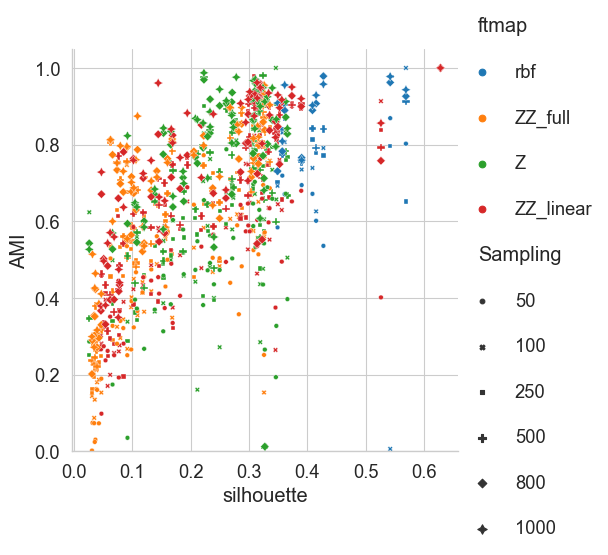

In [35]:
#Plot
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.relplot(data=df_nmi_ari_new_2,hue='ftmap',
             y='AMI',x='silhouette',style='Sampling',size='Sampling',markers=True,palette='tab10')
plt.ylim(0.00,1.05)

In [43]:
new_labels=[
 'Classical',
 'Quantum',
 '',
 'RBF',
 'ZZ linear, $\\beta=\\frac{\\pi}{8}$',
 'ZZ linear, $\\beta=\\frac{\\pi}{4}$',
 'ZZ linear, $\\beta=\\frac{\\pi}{2}$']

/tmp/ipykernel_40548/432017200.py:19: UserWarning: The markers list has more values (12) than needed (4), which may not be intended.
  sns.lineplot(ax=axes[2], data=data_k10, x='Sampling', y='AMI', style='Clust_2', markers=markers,markersize=7,style_order=styles_ord,
/tmp/ipykernel_40548/432017200.py:21: UserWarning: The markers list has more values (12) than needed (4), which may not be intended.
  sns.scatterplot(ax=axes[2], data=data_k10, x='Sampling', y='AMI', style='Clust_2', markers=markers,s=53,style_order=styles_ord,
/tmp/ipykernel_40548/432017200.py:40: UserWarning: The markers list has more values (12) than needed (4), which may not be intended.
  sns.lineplot(ax=axes[1], data=data_k2, x='Sampling', y='AMI', style='Clust_2',markersize=7,style_order=styles_ord,
/tmp/ipykernel_40548/432017200.py:42: UserWarning: The markers list has more values (12) than needed (4), which may not be intended.
  sns.scatterplot(ax=axes[1], data=data_k2, x='Sampling', y='AMI', style='Clust_2',s=5

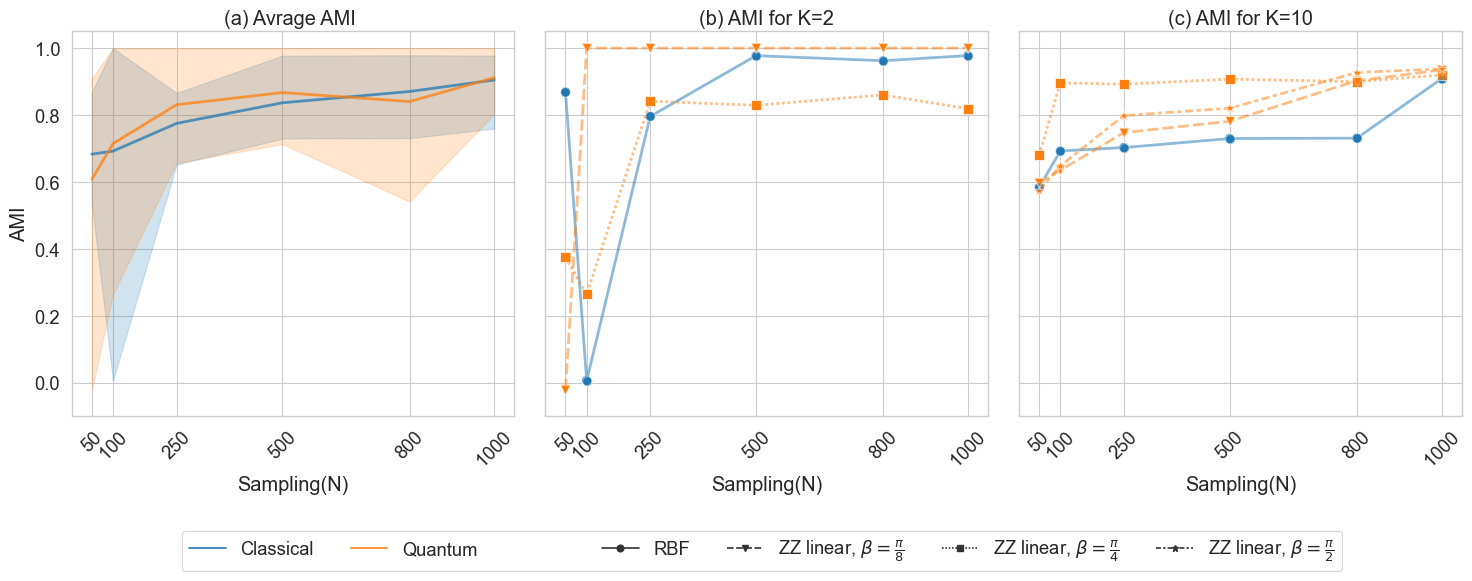

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5),sharey=True)
s_threshold = 0.3

# Define markers
markers = ["o", "v", "s", "*", "h", "H", "P", "p","^", "<", ">","8"]
styles_ord=df_nmi_ari_new_2[(df_nmi_ari_new_2.silhouette >= s_threshold) & (df_nmi_ari_new_2.ftmap.isin(['ZZ_linear','rbf']))].Clust_2.unique()
#Plot all above 0.35 with mean
sns.lineplot(ax=axes[0],data=df_nmi_ari_new_2[(df_nmi_ari_new_2.silhouette >= s_threshold) & (df_nmi_ari_new_2.ftmap.isin(['ZZ_linear','rbf']))], 
             x='Sampling', y='AMI', hue='Quantum/Classical', err_style='band',errorbar=('pi',100),legend=False,palette='tab10',alpha=0.75,linewidth=2)
#sns.lineplot(ax=axes[0],data=df_nmi_ari_new_2[(df_nmi_ari_new_2.silhouette >= s_threshold) & (df_nmi_ari_new_2.ftmap.isin(['ZZ_linear','rbf']))],
                  #x='Sampling', y='AMI', hue='Quantum/Classical', markers=markers,style='Clust',palette='tab10',legend=False,alpha=0.15)
axes[0].set_title('(a) Avrage AMI ')
axes[0].set_xlabel('Sampling(N)')
# Filter data for K=10 and K=2
data_k10 = df_nmi_ari_new_2[(df_nmi_ari_new_2.silhouette >= s_threshold) & (df_nmi_ari_new_2.K == 10)  & (df_nmi_ari_new_2.ftmap.isin(['ZZ_linear','rbf']))]
data_k2 = df_nmi_ari_new_2[(df_nmi_ari_new_2.silhouette >= s_threshold) & (df_nmi_ari_new_2.K == 2)  & (df_nmi_ari_new_2.ftmap.isin(['ZZ_linear','rbf']))]

# Plot for K=10
sns.lineplot(ax=axes[2], data=data_k10, x='Sampling', y='AMI', style='Clust_2', markers=markers,markersize=7,style_order=styles_ord,
              hue='Quantum/Classical',hue_order=['Classical','Quantum'],palette='tab10', legend=True, alpha=0.5,linewidth=2)
sns.scatterplot(ax=axes[2], data=data_k10, x='Sampling', y='AMI', style='Clust_2', markers=markers,s=53,style_order=styles_ord,
                hue='Quantum/Classical',hue_order=['Classical','Quantum'], palette='tab10', legend=False)
#Move legend outside plot
#sns.move_legend(axes[2],"upper left", bbox_to_anchor=(1, 1))
handles,labels = axes[2].get_legend_handles_labels()
axes[2].legend_.remove()
#NEW COSTUMIZED LABELS
#put legend under current axes
#axes[2].legend(handles=handles[1:],labels=new_labels,loc='upper center',bbox_to_anchor=(0.5,0))
# Put a legend below current axis
fig.legend(handles=handles[1:],labels=new_labels,loc='upper center', bbox_to_anchor=(0.47, -0.1),
          fancybox=True, shadow=False, ncol=7)

axes[2].set_title('(c) AMI for K=10')
axes[2].set_ylim(0.00,1.0)
axes[2].set_xlabel('Sampling(N)')


# Plot for K=2
sns.lineplot(ax=axes[1], data=data_k2, x='Sampling', y='AMI', style='Clust_2',markersize=7,style_order=styles_ord,
             markers=markers, hue='Quantum/Classical', palette='tab10', legend=False, alpha=0.5,linewidth=2)
sns.scatterplot(ax=axes[1], data=data_k2, x='Sampling', y='AMI', style='Clust_2',s=53,style_order=styles_ord,
                markers=markers, hue='Quantum/Classical', palette='tab10', legend=False)

axes[1].set_title('(b) AMI for K=2')
axes[1].set_xlabel('Sampling(N)')

#change xticks and rotate
axes[0].set_xticks([50,100,250,500,800,1000])
axes[1].set_xticks([50,100,250,500,800,1000])
axes[2].set_xticks([50,100,250,500,800,1000])
#rotaate
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='x', rotation=45)
# Adjust layout
plt.ylim(-0.1,1.05)
plt.subplots_adjust(wspace=0.07,right=0.82)
#plt.tight_layout()
plt.savefig('images/paper/AMI_sampling.pdf',format='pdf',dpi=600,bbox_inches='tight')

In [216]:
data_k10[data_k10['Sampling']==250]

ftmap   K  Bandwidth       ARI       NMI       AMI          $\beta$  \
8          rbf  10      1.000  0.640919  0.727285  0.702802            $\pi$   
107  ZZ_linear  10      0.125  0.587096  0.768410  0.747522  $\frac{\pi}{8}$   
116  ZZ_linear  10      0.250  0.841181  0.901167  0.892114  $\frac{\pi}{4}$   
125  ZZ_linear  10      0.500  0.761600  0.815897  0.798484  $\frac{\pi}{2}$   

     Sampling              s  geom_distance  concentration  silhouette  \
8         250  126427.404049       2.459801       0.028149    0.348825   
107       250  198446.008917      11.510186       0.066276    0.333482   
116       250  146583.001305       5.823200       0.080595    0.389346   
125       250  155662.984070       4.546541       0.041996    0.301121   

     Score_cluster         CHI        DI   v_intra   v_inter  \
8         0.735891  831.105806  0.000546  0.002630  0.027722   
107       0.677637  724.785238  0.054368  0.004517  0.056102   
116       0.600019  649.065192  0.036875  0.023439  0.050366   
125       0.384869  328.817146  0.048000  0.062120  0.017824   

                            Clust                    Clust_2 Quantum/Classical  
8                    rbf_10_$\pi$                  rbf_$\pi$         Classical  
107  ZZ_linear_10_$\frac{\pi}{8}$  ZZ_linear_$\frac{\pi}{8}$           Quantum  
116  ZZ_linear_10_$\frac{\pi}{4}$  ZZ_linear_$\frac{\pi}{4}$           Quantum  
125  ZZ_linear_10_$\frac{\pi}{2}$  ZZ_linear_$\frac{\pi}{2}$           Quantum

In [85]:
font=fm.findfont(fm.FontProperties(family=['sans-serif']))
font

'/Volumes/HD2/home/danilo/.fonts/arial.ttf'

/tmp/ipykernel_3650475/1971046713.py:3: UserWarning: 
The markers list has fewer values (12) than needed (52) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_nmi_ari_new_2[(df_nmi_ari_new_2.silhouette >= s_threshold)],


<Axes: xlabel='Sampling', ylabel='AMI'>

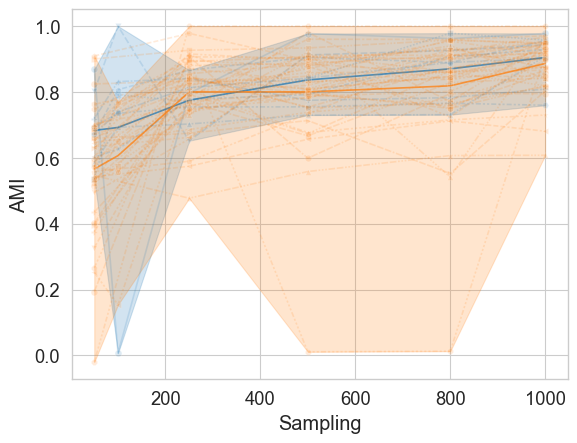

In [86]:

sns.lineplot(data=df_nmi_ari_new_2[(df_nmi_ari_new_2.silhouette >= s_threshold)], 
             x='Sampling', y='AMI', hue='Quantum/Classical', err_style='band',errorbar=('pi',100),legend=False,palette='tab10',alpha=0.75)
sns.lineplot(data=df_nmi_ari_new_2[(df_nmi_ari_new_2.silhouette >= s_threshold)],
                  x='Sampling', y='AMI', hue='Quantum/Classical', markers=markers,style='Clust',palette='tab10',legend=False,alpha=0.15)

/tmp/ipykernel_3650475/156751545.py:2: UserWarning: The markers list has more values (12) than needed (5), which may not be intended.
  sns.relplot(data=df_nmi_ari_new_2[(df_nmi_ari_new_2.ftmap.isin(['ZZ_linear','rbf','ZZ_full'])) & (df_nmi_ari_new_2.silhouette >= s_threshold)],


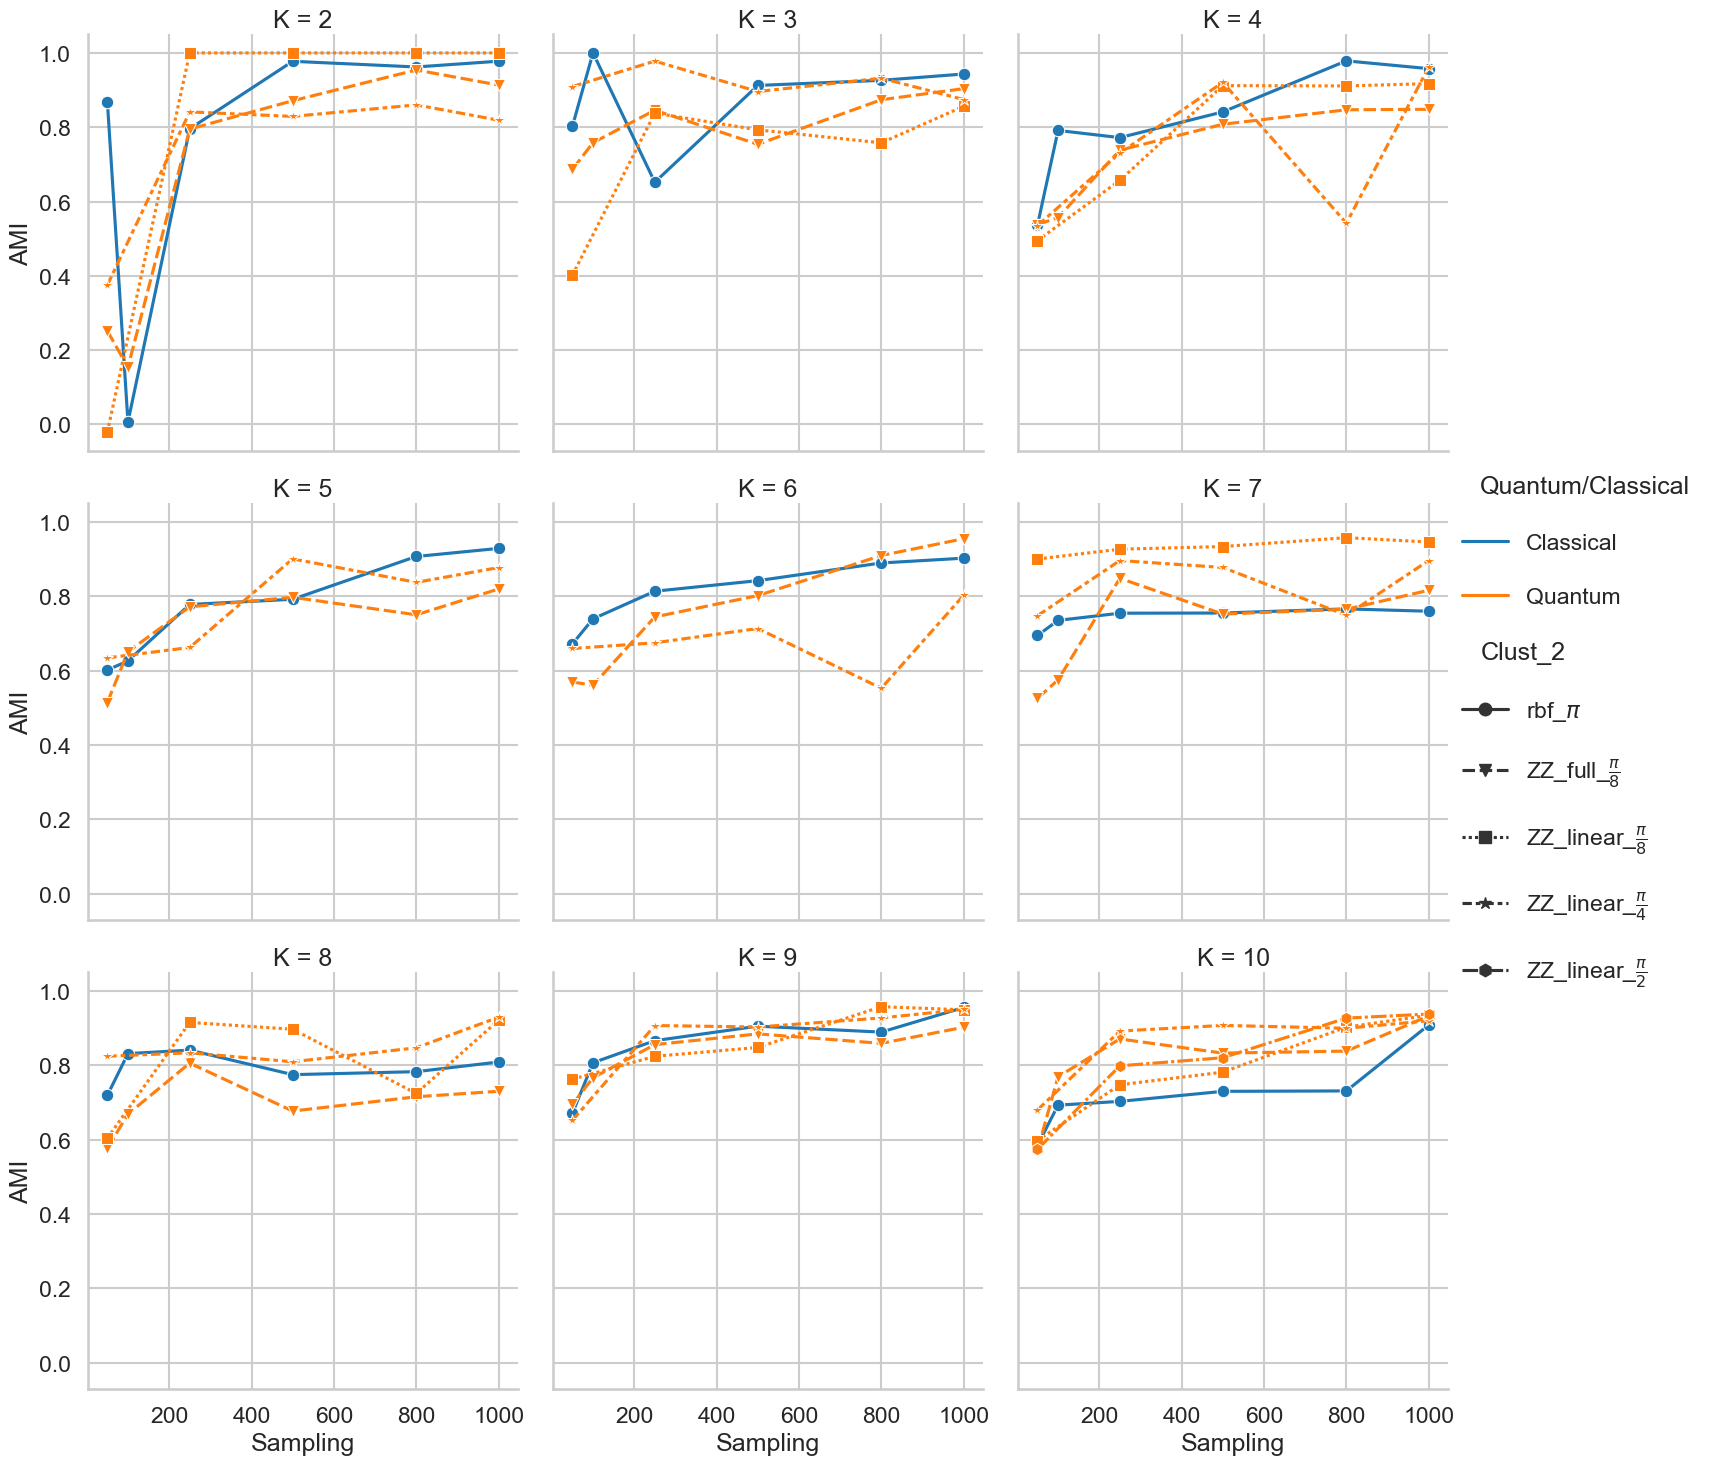

In [87]:
sns.set_context("talk", font_scale=1)
sns.relplot(data=df_nmi_ari_new_2[(df_nmi_ari_new_2.ftmap.isin(['ZZ_linear','rbf','ZZ_full'])) & (df_nmi_ari_new_2.silhouette >= s_threshold)],
             style='Clust_2', markers=markers, x='Sampling', y='AMI', hue='Quantum/Classical', palette='tab10',col='K',col_wrap=3,kind='line')


/tmp/ipykernel_308060/898171921.py:8: UserWarning: The markers list has more values (12) than needed (9), which may not be intended.
  sns.lineplot(ax=axes[0],data=df_ami_filtered[df_ami_filtered.ftmap=='rbf'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['red'],legend=False,alpha=0.35)
/tmp/ipykernel_308060/898171921.py:11: UserWarning: The markers list has more values (12) than needed (7), which may not be intended.
  sns.lineplot(ax=axes[1],data= df_ami_filtered[df_ami_filtered.ftmap=='Z'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['blue'],legend=False,alpha=0.35)
/tmp/ipykernel_308060/898171921.py:14: UserWarning: The markers list has more values (12) than needed (9), which may not be intended.
  sns.lineplot(ax=axes[2],data= df_ami_filtered[df_ami_filtered.ftmap=='ZZ_linear'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['green'],legend=False,alpha=0.35)
/tmp/ipykernel_308060/898171921.py:17: Us

[0.0, 1.01, 0.0, 1.01, 0.0, 1.01, 0.0, 1.01]

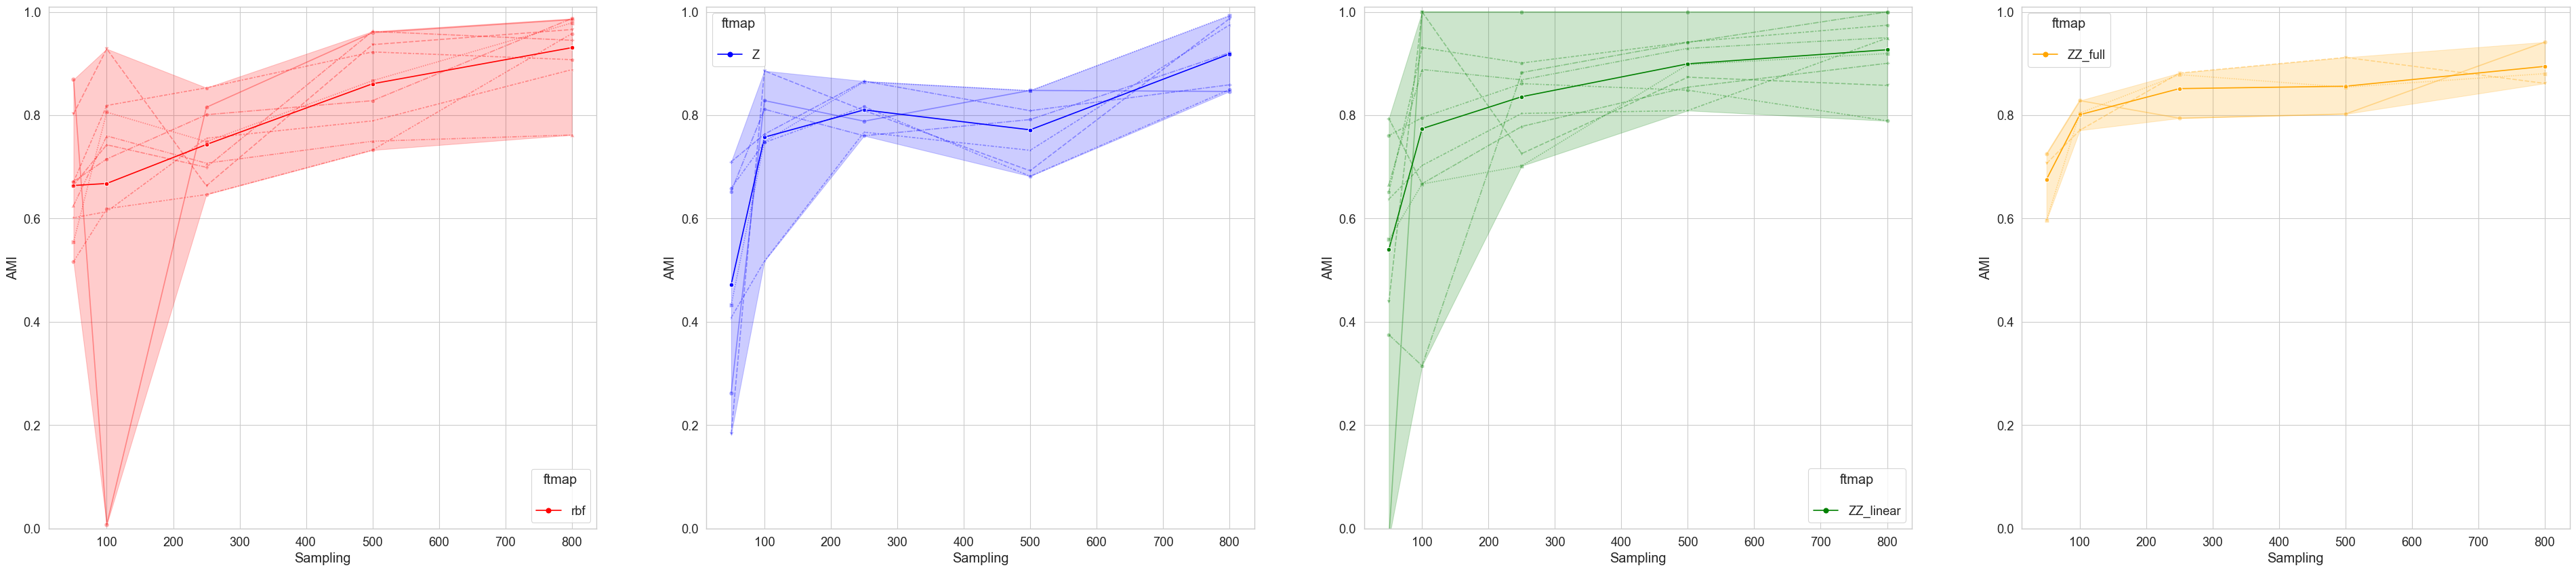

In [162]:
fig, axes = plt.subplots(1, 4, figsize=(48, 10))
error_type=('pi',100)
#filter dataset from silhouette
df_ami_filtered=df_nmi_ari_new[df_nmi_ari_new.silhouette>0.35]
sns.set_style("whitegrid")
#rbf
sns.lineplot(ax=axes[0],data=df_ami_filtered[df_ami_filtered.ftmap=='rbf'],x='Sampling',y='AMI',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['red'])
sns.lineplot(ax=axes[0],data=df_ami_filtered[df_ami_filtered.ftmap=='rbf'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['red'],legend=False,alpha=0.35)
#Z
sns.lineplot(ax=axes[1],data=df_ami_filtered[df_ami_filtered.ftmap=='Z'],x='Sampling',y='AMI',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['blue'])
sns.lineplot(ax=axes[1],data= df_ami_filtered[df_ami_filtered.ftmap=='Z'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['blue'],legend=False,alpha=0.35)
#ZZ_linear
sns.lineplot(ax=axes[2],data=df_ami_filtered[df_ami_filtered.ftmap=='ZZ_linear'],x='Sampling',y='AMI',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['green'])
sns.lineplot(ax=axes[2],data= df_ami_filtered[df_ami_filtered.ftmap=='ZZ_linear'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['green'],legend=False,alpha=0.35)
#ZZ_full
sns.lineplot(ax=axes[3],data=df_ami_filtered[df_ami_filtered.ftmap=='ZZ_full'],x='Sampling',y='AMI',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['orange'])
sns.lineplot(ax=axes[3],data= df_ami_filtered[df_ami_filtered.ftmap=='ZZ_full'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['orange'],legend=False,alpha=0.35)
plt.setp(axes, ylim=(0.0,1.01))

# Other considerations

Different Sampling may yield different silhouette trends, let's see how the silhouette behaviour changes across Sample sizes

In [89]:
#Concat data
to_concat_df=[df_50,df_100,df_250,df_500,df_800,df_1000,df_1980]
df_all=pd.concat(to_concat_df)
df_all.head()

ftmap  K  Bandwidth            s  geom_distance  concentration  silhouette  \
0   rbf  2      0.125  8480.075139       1.639028       0.034983    0.497214   
1   rbf  3      0.125  8480.075139       1.639028       0.034983    0.530544   
2   rbf  4      0.125  8480.075139       1.639028       0.034983    0.371858   
3   rbf  5      0.125  8480.075139       1.639028       0.034983    0.355374   
4   rbf  6      0.125  8480.075139       1.639028       0.034983    0.416779   

   Score_cluster        CHI        DI   v_intra   v_inter  N_samples  
0       0.507181  32.446320  0.014017  0.026432  0.031978         50  
1       0.643624  35.030083  0.028784  0.005701  0.041672         50  
2       0.613851  27.988297  0.020852  0.006230  0.039780         50  
3       0.655066  29.069299  0.024274  0.004871  0.037367         50  
4       0.727475  31.593986  0.052103  0.003291  0.035695         50

In [90]:
df_all['Clust']=df_all['ftmap']+'_'+df_all['K'].astype(str)+'_'+df_all['Bandwidth'].astype(str)

### Plots

[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]

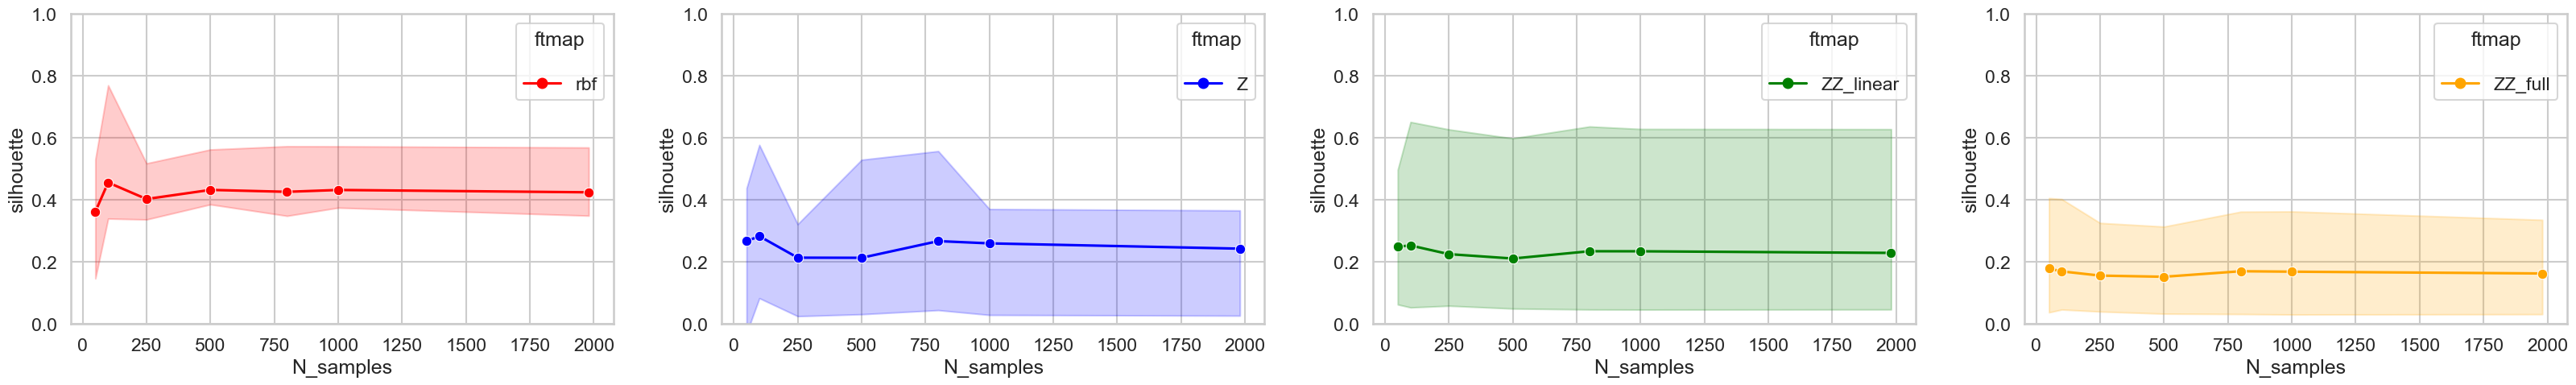

In [91]:
fig, axes = plt.subplots(1, 4, figsize=(40, 5))
error_type=('pi',100)
sns.set_style("whitegrid")
sns.lineplot(ax=axes[0],data=df_all[df_all.ftmap=='rbf'],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['red'])
sns.lineplot(ax=axes[1],data=df_all[df_all.ftmap=='Z'],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['blue'])
sns.lineplot(ax=axes[2],data=df_all[df_all.ftmap=='ZZ_linear'],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['green'])
sns.lineplot(ax=axes[3],data=df_all[df_all.ftmap=='ZZ_full'],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['orange'])
plt.setp(axes, ylim=(0.0,1))

let's see how they behave singularly

/tmp/ipykernel_3650475/2760658642.py:7: UserWarning: 
The markers list has fewer values (12) than needed (45) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(ax=axes[0],data= df_all[df_all.ftmap=='rbf'],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['red'],legend=False,alpha=0.35)
/tmp/ipykernel_3650475/2760658642.py:10: UserWarning: 
The markers list has fewer values (12) than needed (45) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(ax=axes[1],data= df_all[df_all.ftmap=='Z'],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['blue'],legend=False,alpha=0.35)
/tmp/ipykernel_3650475/2760658642.py:13: UserWarning: 
The markers list has fewer values (12) than needed (45) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(ax=axes[2],data= df_all[df_all.ftmap=='ZZ_linear'],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palet

[0.0, 0.8, 0.0, 0.8, 0.0, 0.8, 0.0, 0.8]

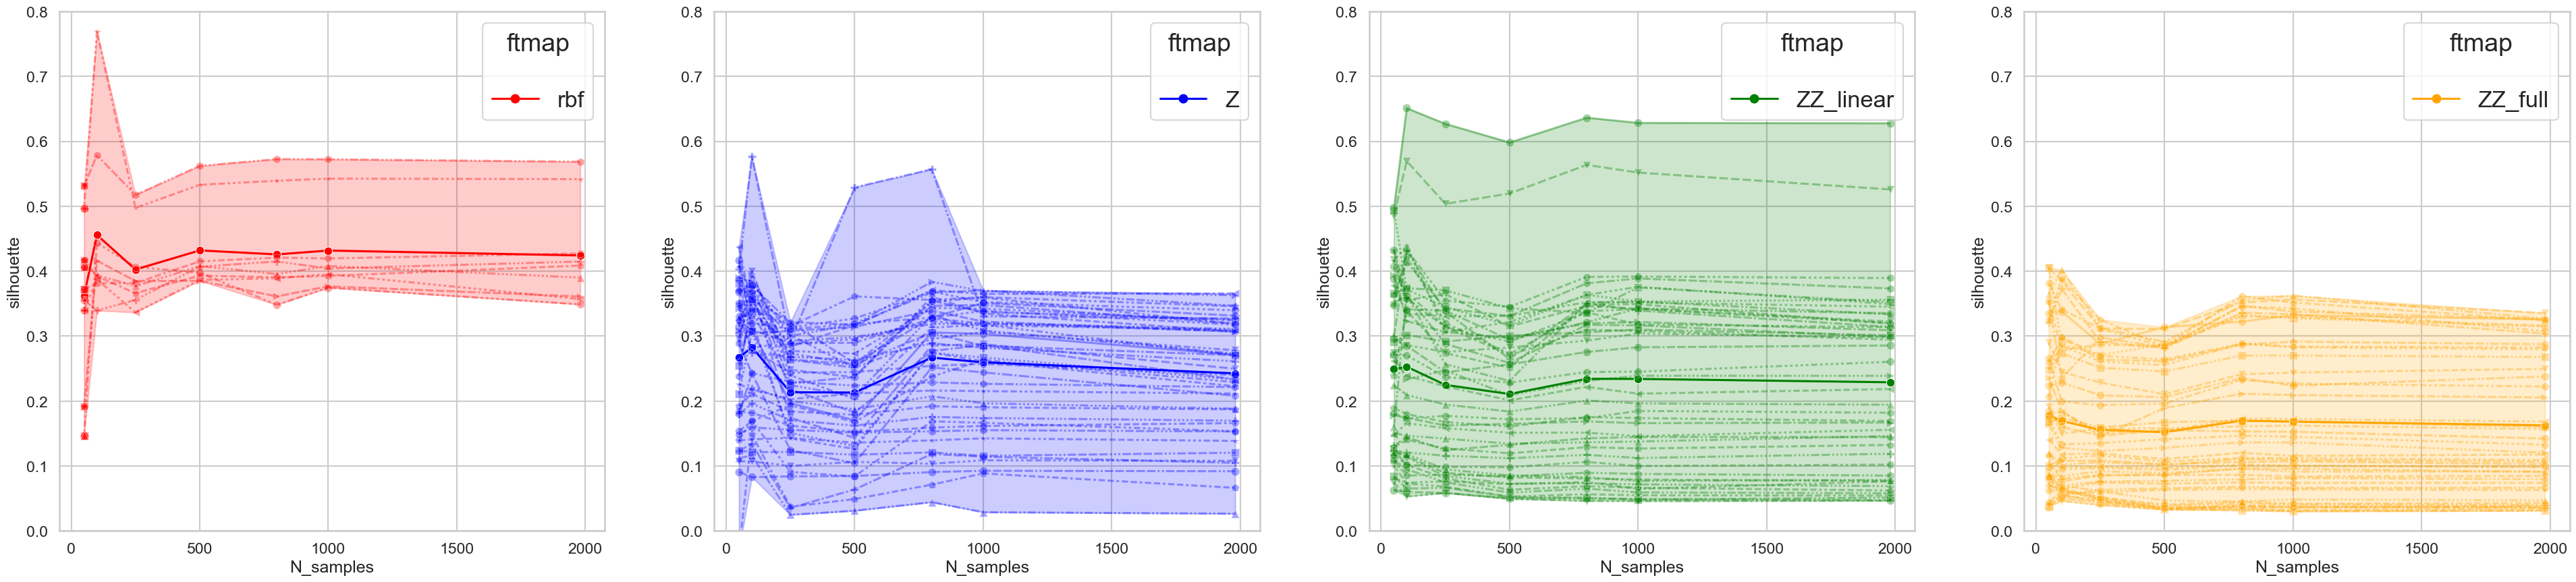

In [92]:
fig, axes = plt.subplots(1, 4, figsize=(48, 10))
error_type=('pi',100)
sns.set_style("whitegrid")
sns.set_context("talk",font_scale=1.5)
#rbf
sns.lineplot(ax=axes[0],data=df_all[df_all.ftmap=='rbf'],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['red'])
sns.lineplot(ax=axes[0],data= df_all[df_all.ftmap=='rbf'],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['red'],legend=False,alpha=0.35)
#Z
sns.lineplot(ax=axes[1],data=df_all[df_all.ftmap=='Z'],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['blue'])
sns.lineplot(ax=axes[1],data= df_all[df_all.ftmap=='Z'],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['blue'],legend=False,alpha=0.35)
#ZZ_linear
sns.lineplot(ax=axes[2],data=df_all[df_all.ftmap=='ZZ_linear'],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['green'])
sns.lineplot(ax=axes[2],data= df_all[df_all.ftmap=='ZZ_linear'],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['green'],legend=False,alpha=0.35)
#ZZ_full
sns.lineplot(ax=axes[3],data=df_all[df_all.ftmap=='ZZ_full'],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['orange'])
sns.lineplot(ax=axes[3],data= df_all[df_all.ftmap=='ZZ_full'],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['orange'],legend=False,alpha=0.35)
plt.setp(axes, ylim=(0.0,0.8))

In [93]:
df_all[(df_all.N_samples!='2000')]

ftmap   K  Bandwidth              s  geom_distance  concentration  \
0          rbf   2      0.125    8480.075139       1.639028       0.034983   
1          rbf   3      0.125    8480.075139       1.639028       0.034983   
2          rbf   4      0.125    8480.075139       1.639028       0.034983   
3          rbf   5      0.125    8480.075139       1.639028       0.034983   
4          rbf   6      0.125    8480.075139       1.639028       0.034983   
..         ...  ..        ...            ...            ...            ...   
175  ZZ_linear   6      2.000  142283.151697      35.370720       0.012055   
176  ZZ_linear   7      2.000  142283.151697      35.370720       0.012055   
177  ZZ_linear   8      2.000  142283.151697      35.370720       0.012055   
178  ZZ_linear   9      2.000  142283.151697      35.370720       0.012055   
179  ZZ_linear  10      2.000  142283.151697      35.370720       0.012055   

     silhouette  Score_cluster        CHI        DI   v_intra   v_inter  \
0      0.497214       0.507181  32.446320  0.014017  0.026432  0.031978   
1      0.530544       0.643624  35.030083  0.028784  0.005701  0.041672   
2      0.371858       0.613851  27.988297  0.020852  0.006230  0.039780   
3      0.355374       0.655066  29.069299  0.024274  0.004871  0.037367   
4      0.416779       0.727475  31.593986  0.052103  0.003291  0.035695   
..          ...            ...        ...       ...       ...       ...   
175    0.057790       0.089948  41.112759  0.048057  0.024311  0.006531   
176    0.062091       0.100920  32.777881  0.052108  0.026224  0.006588   
177    0.068919       0.113717  35.198769  0.051035  0.028806  0.006646   
178    0.076932       0.119561  43.622137  0.047041  0.030147  0.006621   
179    0.078305       0.125044  40.267353  0.051040  0.032127  0.006694   

     N_samples             Clust  
0           50       rbf_2_0.125  
1           50       rbf_3_0.125  
2           50       rbf_4_0.125  
3           50       rbf_5_0.125  
4           50       rbf_6_0.125  
..         ...               ...  
175       1980   ZZ_linear_6_2.0  
176       1980   ZZ_linear_7_2.0  
177       1980   ZZ_linear_8_2.0  
178       1980   ZZ_linear_9_2.0  
179       1980  ZZ_linear_10_2.0  

[1044 rows x 14 columns]

/tmp/ipykernel_3650475/598319276.py:7: UserWarning: 
The markers list has fewer values (12) than needed (45) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(ax=axes[0],data= df_all[(df_all.ftmap=='rbf') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['red'],legend=False,alpha=0.35)
/tmp/ipykernel_3650475/598319276.py:10: UserWarning: 
The markers list has fewer values (12) than needed (45) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(ax=axes[1],data= df_all[(df_all.ftmap=='Z') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['blue'],legend=False,alpha=0.35)
/tmp/ipykernel_3650475/598319276.py:13: UserWarning: 
The markers list has fewer values (12) than needed (45) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(ax=axes[2],data= df_all[(df_all.ftmap=='ZZ_linear') & (df_all.N_samples!=1

[0.0, 0.8, 0.0, 0.8, 0.0, 0.8, 0.0, 0.8]

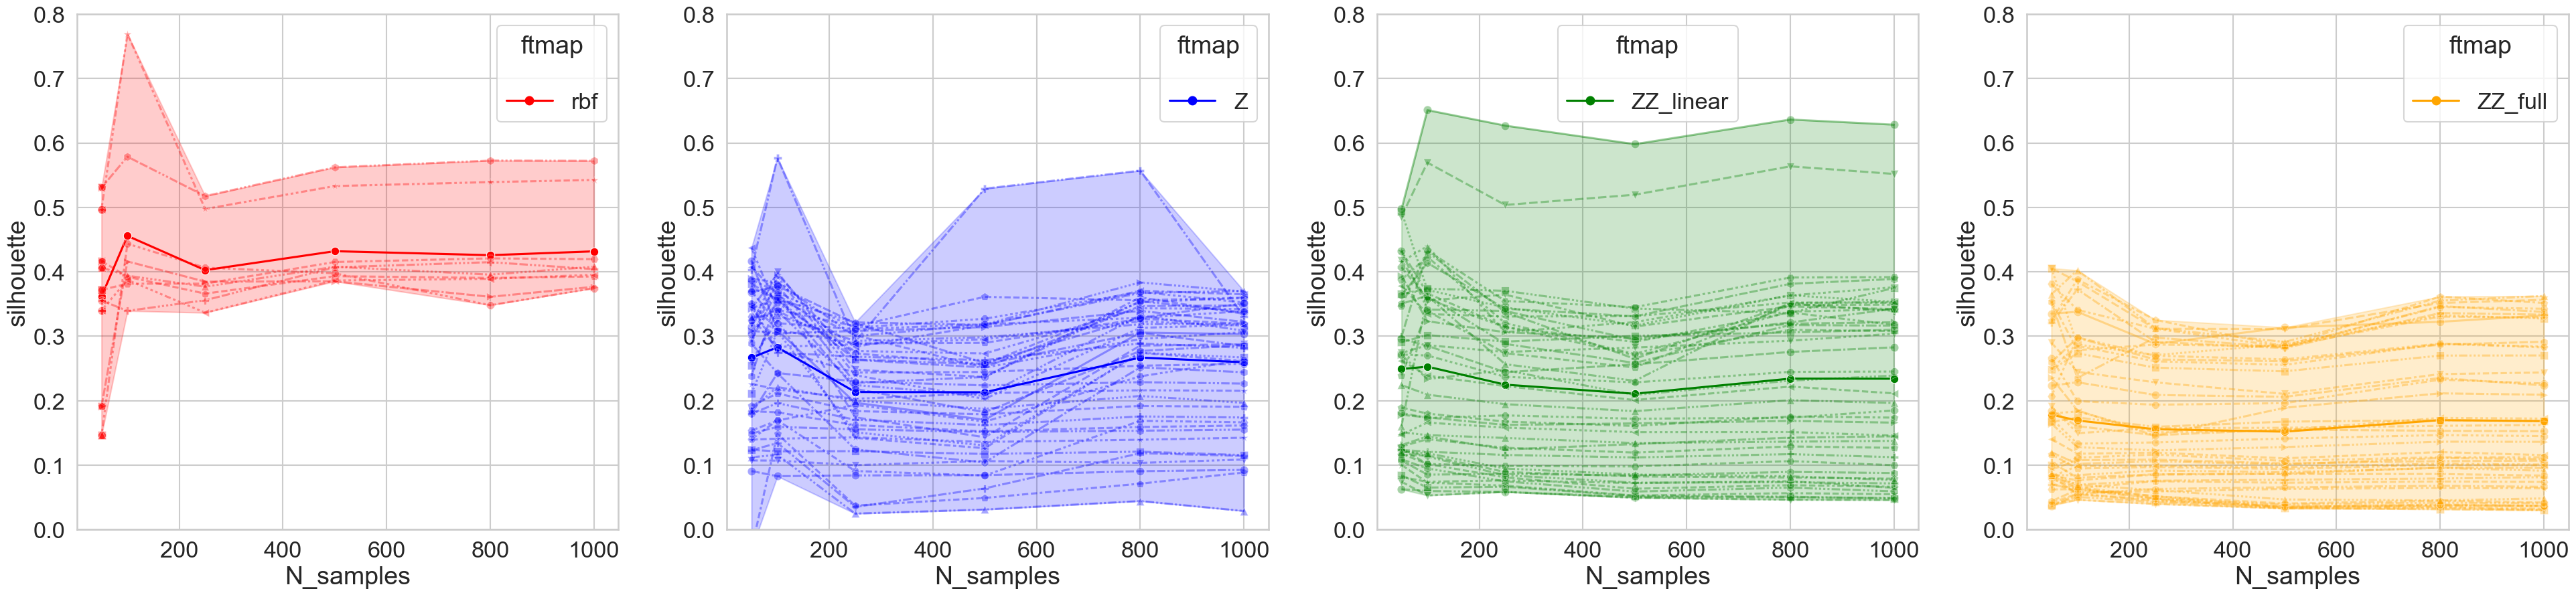

In [94]:
fig, axes = plt.subplots(1, 4, figsize=(48, 10))
error_type=('pi',100)
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.5)
#rbf
sns.lineplot(ax=axes[0],data=df_all[(df_all.ftmap=='rbf') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['red'])
sns.lineplot(ax=axes[0],data= df_all[(df_all.ftmap=='rbf') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['red'],legend=False,alpha=0.35)
#Z
sns.lineplot(ax=axes[1],data=df_all[(df_all.ftmap=='Z') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['blue'])
sns.lineplot(ax=axes[1],data= df_all[(df_all.ftmap=='Z') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['blue'],legend=False,alpha=0.35)
#ZZ_linear
sns.lineplot(ax=axes[2],data=df_all[(df_all.ftmap=='ZZ_linear') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['green'])
sns.lineplot(ax=axes[2],data= df_all[(df_all.ftmap=='ZZ_linear') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['green'],legend=False,alpha=0.35)
#ZZ_full
sns.lineplot(ax=axes[3],data=df_all[(df_all.ftmap=='ZZ_full') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['orange'])
sns.lineplot(ax=axes[3],data= df_all[(df_all.ftmap=='ZZ_full') & (df_all.N_samples!=1980)],x='N_samples',y='silhouette', hue='ftmap', markers=markers,style='Clust',palette=['orange'],legend=False,alpha=0.35)
plt.setp(axes, ylim=(0.0,0.8))

/tmp/ipykernel_3650475/56679303.py:10: UserWarning: The markers list has more values (12) than needed (9), which may not be intended.
  sns.lineplot(ax=axes[0],data=df_ami_filtered[df_ami_filtered.ftmap=='rbf'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['red'],legend=False,alpha=0.35)
/tmp/ipykernel_3650475/56679303.py:13: UserWarning: The markers list has more values (12) than needed (9), which may not be intended.
  sns.lineplot(ax=axes[1],data= df_ami_filtered[df_ami_filtered.ftmap=='Z'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['blue'],legend=False,alpha=0.35)
/tmp/ipykernel_3650475/56679303.py:16: UserWarning: The markers list has more values (12) than needed (11), which may not be intended.
  sns.lineplot(ax=axes[2],data= df_ami_filtered[df_ami_filtered.ftmap=='ZZ_linear'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['green'],legend=False,alpha=0.35)
/tmp/ipykernel_3650475/56679303.py:19: 

[0.0, 1.01, 0.0, 1.01, 0.0, 1.01, 0.0, 1.01]

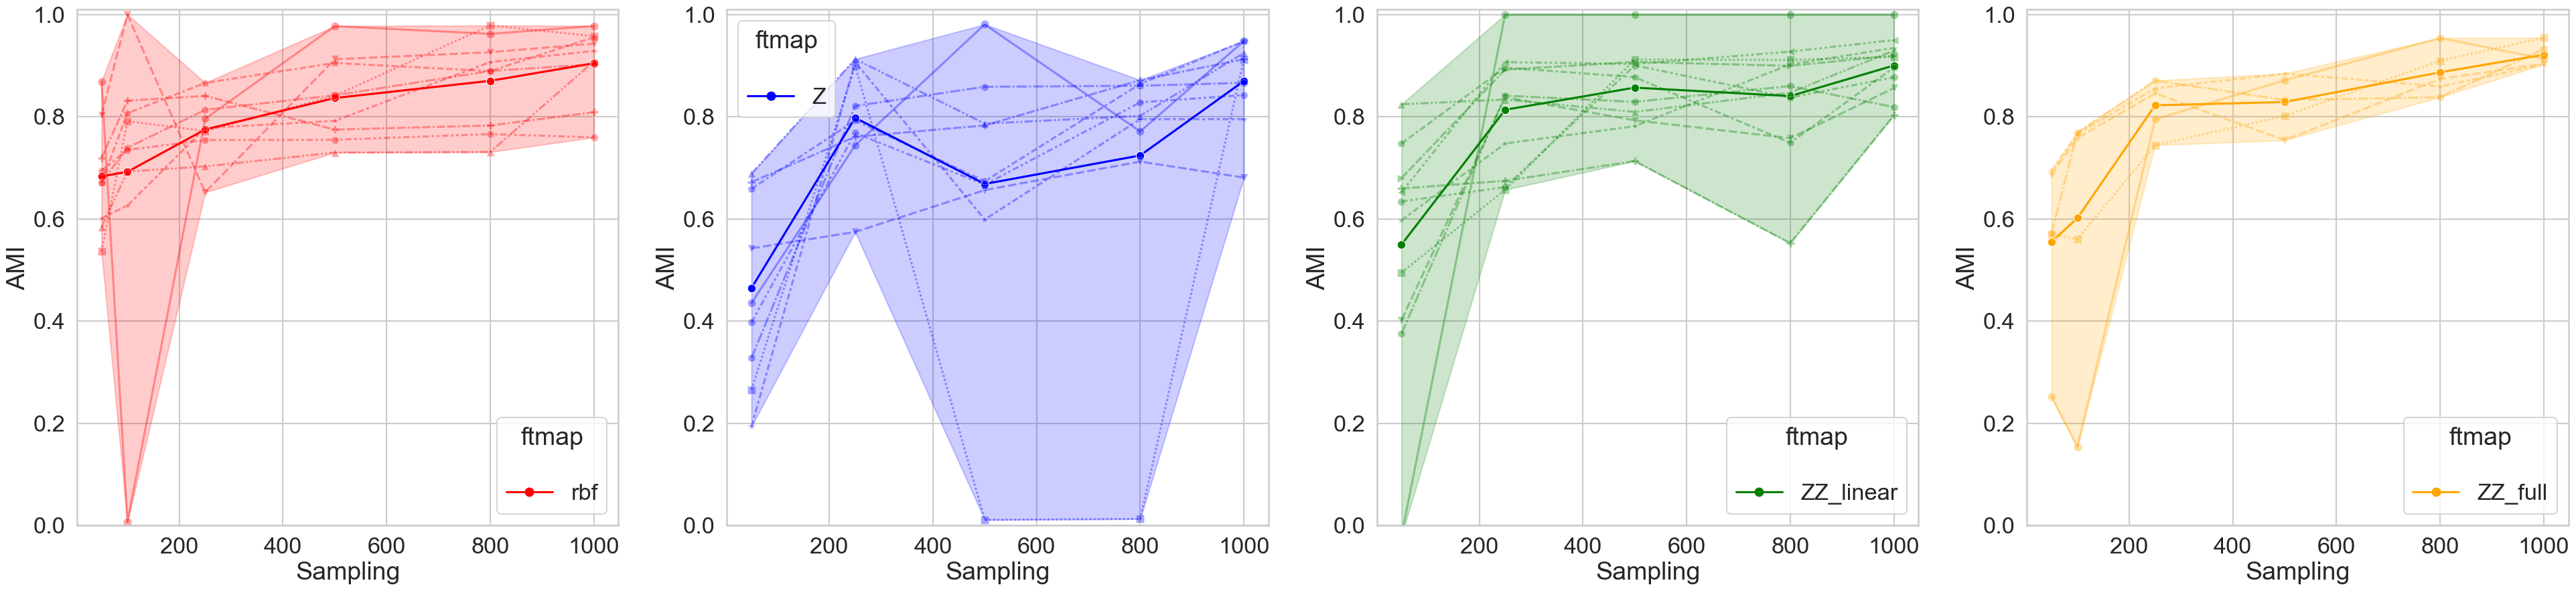

In [95]:
fig, axes = plt.subplots(1, 4, figsize=(48, 10))
error_type=('pi',100)
#filter dataset from silhouette
sns.set_context("talk", font_scale=1.5)
#rbf
df_ami_filtered=df_nmi_ari_new_2[df_nmi_ari_new_2.silhouette>0.32]
sns.set_style("whitegrid")
#rbf
sns.lineplot(ax=axes[0],data=df_ami_filtered[df_ami_filtered.ftmap=='rbf'],x='Sampling',y='AMI',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['red'])
sns.lineplot(ax=axes[0],data=df_ami_filtered[df_ami_filtered.ftmap=='rbf'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['red'],legend=False,alpha=0.35)
#Z
sns.lineplot(ax=axes[1],data=df_ami_filtered[df_ami_filtered.ftmap=='Z'],x='Sampling',y='AMI',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['blue'])
sns.lineplot(ax=axes[1],data= df_ami_filtered[df_ami_filtered.ftmap=='Z'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['blue'],legend=False,alpha=0.35)
#ZZ_linear
sns.lineplot(ax=axes[2],data=df_ami_filtered[df_ami_filtered.ftmap=='ZZ_linear'],x='Sampling',y='AMI',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['green'])
sns.lineplot(ax=axes[2],data= df_ami_filtered[df_ami_filtered.ftmap=='ZZ_linear'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['green'],legend=False,alpha=0.35)
#ZZ_full
sns.lineplot(ax=axes[3],data=df_ami_filtered[df_ami_filtered.ftmap=='ZZ_full'],x='Sampling',y='AMI',hue='ftmap',errorbar=error_type,style='ftmap',markers=True,palette=['orange'])
sns.lineplot(ax=axes[3],data= df_ami_filtered[df_ami_filtered.ftmap=='ZZ_full'],x='Sampling',y='AMI', hue='ftmap', markers=markers,style='Clust',palette=['orange'],legend=False,alpha=0.35)
plt.setp(axes, ylim=(0.0,1.01))

## Silhouette distribution


array([[<Axes: title={'center': 'silhouette'}>]], dtype=object)

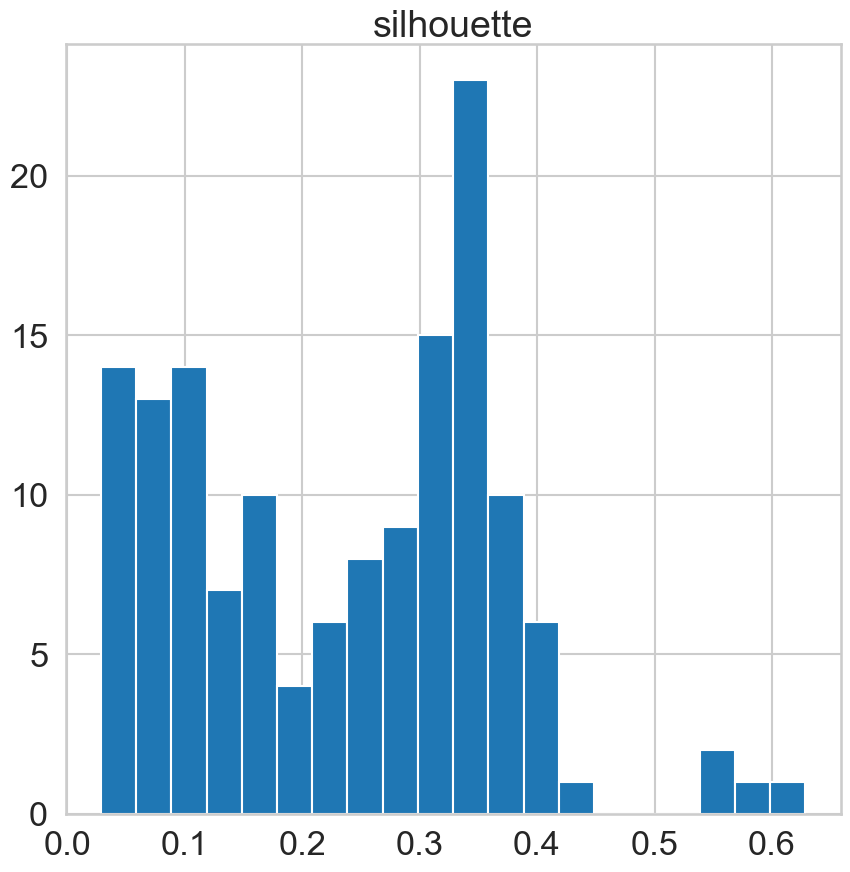

In [96]:
df_1000.hist(column='silhouette',bins=20,figsize=(10,10),sharex=True,sharey=True)

<Axes: xlabel='silhouette', ylabel='Density'>

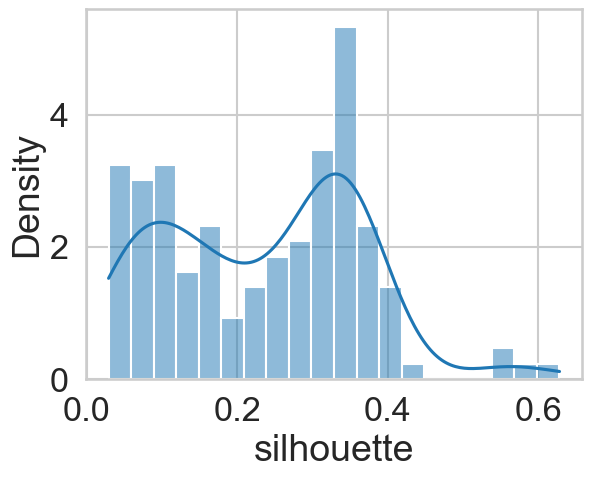

In [97]:
sns.histplot(data=df_1000,x='silhouette',bins=20,stat='density',kde=True)

In [98]:
df_1000['silhouette'].describe()

count    144.000000
mean       0.233805
std        0.131053
min        0.028657
25%        0.111329
50%        0.251188
75%        0.338929
max        0.628426
Name: silhouette, dtype: float64

In [99]:
df_stat=pd.concat([df_1000,df_1980])

<Axes: xlabel='silhouette', ylabel='Count'>

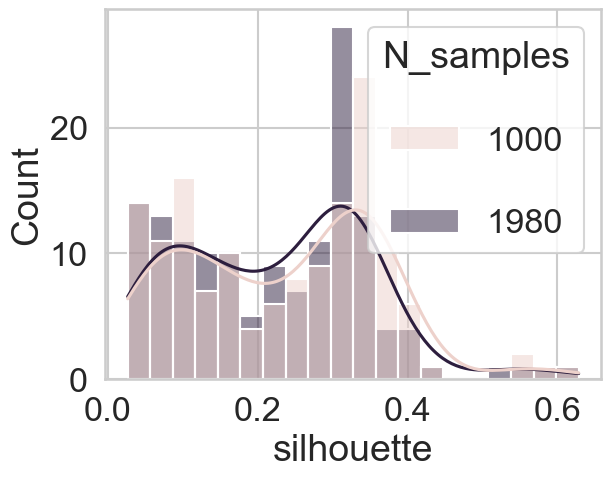

In [100]:
sns.histplot(data=df_stat,x='silhouette',bins=20,stat='count',kde=True,hue='N_samples')

In [101]:
df_stat[df_stat['N_samples']==1000]['silhouette'].describe()

count    144.000000
mean       0.233805
std        0.131053
min        0.028657
25%        0.111329
50%        0.251188
75%        0.338929
max        0.628426
Name: silhouette, dtype: float64